In [43]:
!pip install geopandas
!pip install rasterio
!pip install numpy
!pip install contextily

The folder you are executing pip from can no longer be found.
The folder you are executing pip from can no longer be found.
The folder you are executing pip from can no longer be found.
The folder you are executing pip from can no longer be found.


In [44]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import contextily as cx

Load LA bus stops and DTLA major transit stops as geojson files for visualization

In [45]:
# Major LA County Transit Stops
major_transit_stops_la = gpd.read_file("../../data/preprocessed/la_major_transit_stops_la.geojson")
major_transit_stops_la.head()

,OBJECTID,stop_id,route_count,route_stop,lat,lon,geometry
0,980,19230,5,"MT078, MT014, MT076, MT033, MT070",34.035211,-118.265408,POINT (-118.26541 34.03521)
1,981,19305,3,"MT078, MT076, MT070",34.036571,-118.264287,POINT (-118.26429 34.03657)
2,982,19363,4,"MT078, MT014, MT076, MT070",34.038288,-118.263289,POINT (-118.26329 34.03829)
3,983,19432,3,"MT078, MT076, MT070",34.040865,-118.260884,POINT (-118.26088 34.04087)
4,984,19475,5,"MT078, MT014, FZ707, MT076, MT070",34.042313,-118.259532,POINT (-118.25953 34.04231)


In [46]:
# Major DTLA County Transit Stops
major_transit_stops_dtla = gpd.read_file("../../data/preprocessed/la_major_transit_stops_dtla.geojson")
major_transit_stops_dtla.head()

,OBJECTID,stop_id,route_count,route_stop,lat,lon,geometry
0,980,19230,5,"MT078, MT014, MT076, MT033, MT070",34.035211,-118.265408,POINT (-118.26541 34.03521)
1,981,19305,3,"MT078, MT076, MT070",34.036571,-118.264287,POINT (-118.26429 34.03657)
2,982,19363,4,"MT078, MT014, MT076, MT070",34.038288,-118.263289,POINT (-118.26329 34.03829)
3,983,19432,3,"MT078, MT076, MT070",34.040865,-118.260884,POINT (-118.26088 34.04087)
4,984,19475,5,"MT078, MT014, FZ707, MT076, MT070",34.042313,-118.259532,POINT (-118.25953 34.04231)


In [47]:
# LA Bus Stops
bus_stops = gpd.read_file("../../461/data/bus_stops.geojson")
bus_stops.head()

,id,STOPNUM,STOPNAME,LAT,LONG,LINE_DIR1,LINE_DIR2,LINE_DIR3,LINE_DIR4,LINE_DIR5,...,LINE_DIR8,LINE_DIR9,LINE_DIR10,LINE_DIR11,LINE_DIR12,LINE_DIR13,LINE_DIR14,layer_id,feature_name,geometry
0,0,1,Paramount / Slauson,33.973248,-118.113113,265-S,None,0,0,0,...,0,0,0,0,0,0,0,bus_stops,Bus Stop,POINT (-118.11311 33.97325)
1,1,3,Jefferson / 10th,34.025471,-118.328402,35-N,None,0,0,0,...,0,0,0,0,0,0,0,bus_stops,Bus Stop,POINT (-118.3284 34.02547)
2,2,6,120th / Augustus F Hawkins,33.924696,-118.242222,53-N,120-W,0,0,0,...,0,0,0,0,0,0,0,bus_stops,Bus Stop,POINT (-118.24222 33.9247)
3,3,7,120th / Martin Luther King Hospital,33.924505,-118.240369,53-N,120-E,0,0,0,...,0,0,0,0,0,0,0,bus_stops,Bus Stop,POINT (-118.24037 33.9245)
4,4,12,15054 Sherman Way,34.201075,-118.461953,162-E,None,0,0,0,...,0,0,0,0,0,0,0,bus_stops,Bus Stop,POINT (-118.46195 34.20108)


Visualize bus stops and major transit stops

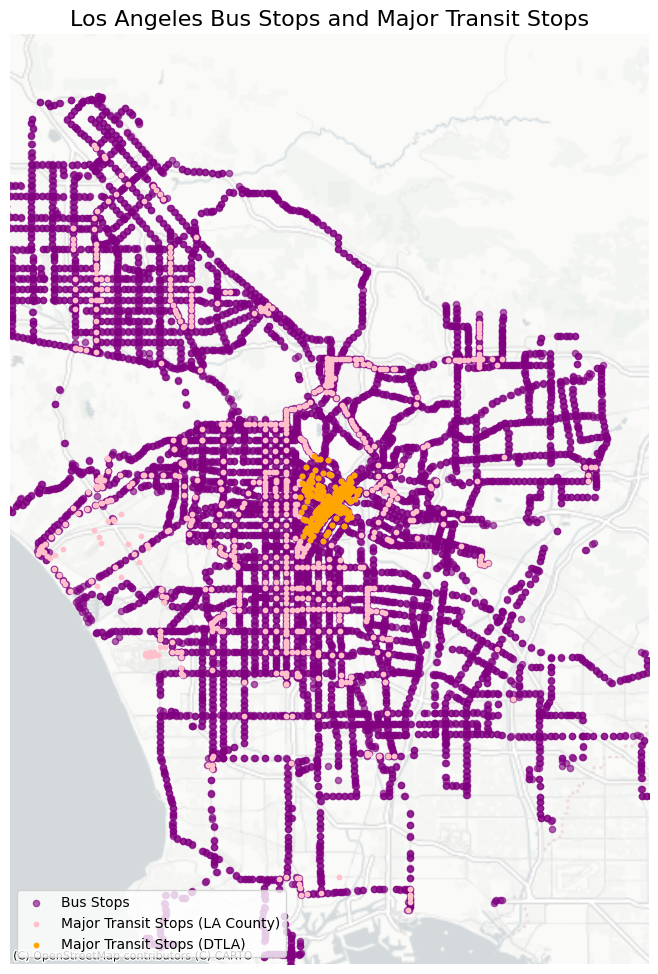

In [48]:
# Make sure both layers use the same projection (Web Mercator for basemap)
bus_stops = bus_stops.to_crs(epsg=3857)
major_transit_stops_la = major_transit_stops_la.to_crs(epsg=3857)
major_transit_stops_dtla = major_transit_stops_dtla.to_crs(epsg=3857)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all bus stops in light purple (lower zorder so they're underneath)
bus_stops.plot(ax=ax, color='purple', markersize=20, alpha=0.6, label='Bus Stops', zorder=1)

# Plot major transit stops (la county) in orange (on top)
major_transit_stops_la.plot(ax=ax, color='pink', markersize=10,
                         label='Major Transit Stops (LA County)', zorder=2)

# Plot major transit stops (dtla) in orange (on top)
major_transit_stops_dtla.plot(ax=ax, color='orange', markersize=10,
                         label='Major Transit Stops (DTLA)', zorder=3)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels)

# OPTIONAL (to zoom in to dtla area)

# Get bounds of major transit stops
minx, miny, maxx, maxy = major_transit_stops_dtla.total_bounds

# Add some padding (increase padding_val to zoom out and decrease to zoom in)
padding_val = 5
x_pad = (maxx - minx) * padding_val
y_pad = (maxy - miny) * padding_val

# Set axis limits to zoom into the area with major transit stops
ax.set_xlim(minx - x_pad, maxx + x_pad)
ax.set_ylim(miny - y_pad, maxy + y_pad)


# Style tweaks
ax.set_axis_off()
ax.set_title('Los Angeles Bus Stops and Major Transit Stops', fontsize=16)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()
